In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scipy

In [2]:
t, l0, m, g, k, gamma = smp.symbols(r't l_0 m g k \gamma')

In [3]:
thet, delt, v_sqr = smp.symbols(r'\theta \Delta v^2', cls=smp.Function)

In [4]:
thet = thet(t)
delt = delt(t)
v_sqr = v_sqr(t)

In [5]:
thet_d = smp.diff(thet, t)
thet_dd = smp.diff(thet_d, t)

delt_d = smp.diff(delt, t)
delt_dd = smp.diff(delt_d, t)

In [6]:
v_sqr = (delt_d**2 + (l0 + delt)**2 * thet_d**2)

In [7]:
T = m * v_sqr / 2
V = -m * g * (l0 + delt) * smp.cos(thet) + k * delt**2 / 2
F = gamma/2 * v_sqr # Rayleigh's dissipation function

In [8]:
L = T - V

In [9]:
Le_thet_lhs = smp.diff(L, thet) - smp.diff(smp.diff(L, thet_d), t) - smp.diff(F, thet_d)
Le_delt_lhs = smp.diff(L, delt) - smp.diff(smp.diff(L, delt_d), t) - smp.diff(F, delt_d)

In [10]:
thet_dd_rhs = smp.solve(Le_thet_lhs, thet_dd)[0]
delt_dd_rhs = smp.solve(Le_delt_lhs, delt_dd)[0]

In [11]:
thet_dd_rhs

-(\gamma*l_0*Derivative(\theta(t), t) + \gamma*\Delta(t)*Derivative(\theta(t), t) + g*m*sin(\theta(t)) + 2*m*Derivative(\Delta(t), t)*Derivative(\theta(t), t))/(m*(l_0 + \Delta(t)))

In [12]:
delt_dd_rhs

(-\gamma*Derivative(\Delta(t), t) - k*\Delta(t) + m*(g*cos(\theta(t)) + l_0*Derivative(\theta(t), t)**2 + \Delta(t)*Derivative(\theta(t), t)**2))/m

$\vec{S}(t) = (\theta(t), \dot{\theta(t)}, \Delta(t), \dot{\Delta(t)})^T$

In [13]:
thet_dd_rhs_f = smp.lambdify([thet, thet_d, delt, delt_d, g, l0, k, m, gamma], thet_dd_rhs, 'numpy')
delt_dd_rhs_f = smp.lambdify([thet, thet_d, delt, delt_d, g, l0, k, m, gamma], delt_dd_rhs, 'numpy')

In [14]:
def dsdt(S, t, g, l0, k, m, gamma):
    return [
        S[1],
        thet_dd_rhs_f(*S, g, l0, k, m, gamma),
        S[3],
        delt_dd_rhs_f(*S, g, l0, k, m, gamma)
    ]

In [36]:
g_val = 9.81
l0_val = 1
m_val = 3
k_val = 100
gamma_val = 0.01 # damping
S0 = [np.pi/12, 0., 0.4, 0.]
ts = np.linspace(0., 120., 3001)

In [37]:
soln = scipy.integrate.odeint(dsdt, S0, ts, args=(g_val, l0_val, k_val, m_val, gamma_val))

In [38]:
theta, theta_d, delta, delta_d = soln.T

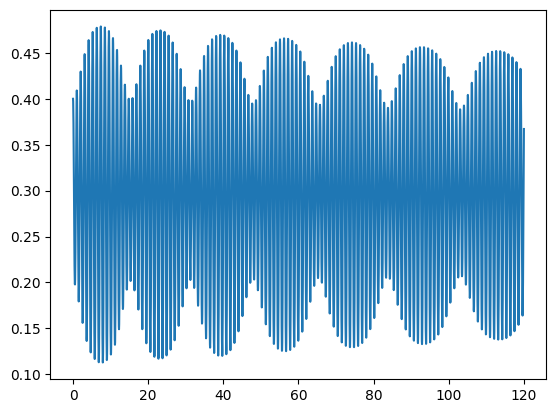

In [39]:
plt.plot(ts, delta)

In [40]:
from matplotlib.animation import FuncAnimation
FRAMERATE = len(ts[ts<1])
print(FRAMERATE)

25


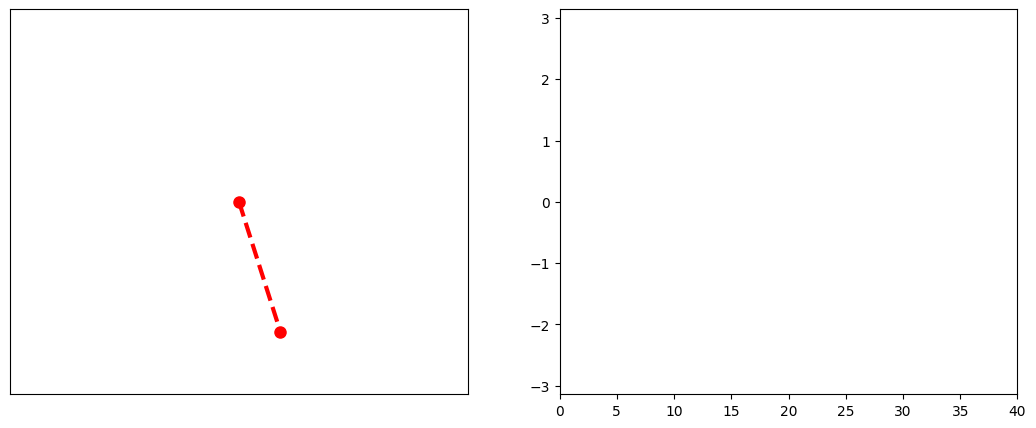

In [41]:
def animate(i):
    ln1.set_data([0, (l0_val + delta[i]) * np.sin(theta[i])], [0, -(l0_val + delta[i]) * np.cos(theta[i])])
    ln2.set_data(ts[:i], theta[:i])


fig, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
ln1, = axs[0].plot([], [], 'ro--', lw=3, ms=8)
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
ln2, = axs[1].plot([], [], '--')
axs[1].set_xlim(0, 40.)
axs[1].set_ylim(-np.pi, np.pi)

ani = FuncAnimation(fig, animate, frames=3000, interval=1)
ani.save('spring_pend_small_angle_init_delta.gif', writer='pillow', fps=FRAMERATE)